一、爬虫主体

In [1]:
#引入文件
import scrapy
from ..items import PicItem
from protego import Protego
from selenium import webdriver
from scrapy.selector import Selector
from  selenium.webdriver.chrome.options import Options
import time

chorme_options = Options()
chorme_options.add_argument("--headless")
chorme_options.add_argument("--disable-gpu")

class MySpider(scrapy.Spider):
    #用于区别Spider
    name = "MySpider"
    #允许访问的域
    allowed_domains = []
    #爬取的地址
    start_urls = ["http://gracg.com/works/best.more?type=tuijian"]

    # 实例化一个浏览器对象
    def __init__(self):
        self.browser = webdriver.Chrome(chrome_options=chorme_options)
        super().__init__()

    def start_requests(self):
        url = "http://gracg.com/works/best.more?type=tuijian"
        response = scrapy.Request(url, callback=self.parse_index)
        # url = "http://gracg.com/works/view/1653438"
        # response = scrapy.Request(url, callback=self.parse_detail)
        yield response

    # 整个爬虫结束后关闭浏览器
    def close(self, spider):
        self.browser.quit()

    #爬取简介页面方法
    def parse_index(self, response):
        # 实例一个容器保存爬取的信息
        filename = "teacher.html"
        with open(filename, 'wb') as f:
            f.write(response.body)
        f.close()
        # item = PicItem()
        for box in response.xpath('//div[@class="container mb-4 mt-4"]/div[@class="row   "]/div/div[1]/div[1]/a[2]'):
            # 获取详情页面
            # item['url'] = 'https://gracg.com' + box.xpath('.//@href').extract()[0]
            # with open("123.html", 'wb') as f:
            #     f.write(item['url'].encode())
            url = 'http://gracg.com' + box.xpath('.//@href').extract()[0]
            print("url",url)
            # 获取详情页面的url并用parse_detail方法解析
            response=scrapy.Request(url,callback=self.parse_detail)
            time.sleep(0.1)
            yield response

    # 爬取详情页面方法
    def parse_detail(self, response):
        with open("item.html", 'wb') as f:
            f.write(response.body)
        f.close()
        div_res = response.xpath('//div[@class=" col-12 col-lg-9   pl-0  pr-0 "]')
        name = div_res.xpath('.//div[@class="font-weight-bold font-24  "]/text()').extract()
        print("name",name)
        date = div_res.xpath('.//div[@class="font-13 text-999 mb-1  "]/text()').extract()
        print("date",date)
        count = div_res.xpath('.//div[@class="d-flex flex-row font-12   pb-2"]')
        seen = count.xpath('./div[1]/span/text()').extract()
        thumb_up = count.xpath('./div[2]/span/text()').extract()
        comment = count.xpath('./div[3]/span/text()').extract()

        tags = div_res.xpath('.//a[@class=" border-50 p-2 font-12 rounded d-block mr-1 mb-1 "]/text()')[1:].extract()
        # 存入Item中并发送给pipeline
        item = PicItem()
        item["name"]=name
        item["date"]=date
        item["seen"] = seen
        item["thumb_up"] = thumb_up
        item["comment"] = comment
        item["tags"] = tags
        yield item

ImportError: attempted relative import with no known parent package

二、items

In [2]:
# Define here the models for your scraped items
import scrapy

class PicItem(scrapy.Item):
    name = scrapy.Field()
    date = scrapy.Field()
    tags = scrapy.Field()
    thumb_up = scrapy.Field()
    comment = scrapy.Field()
    seen = scrapy.Field()
    # define the fields for your item here like:
    # name = sc

三、Mypipelines

In [3]:
#引入文件
from scrapy.exceptions import DropItem
import json

class MyPipeline(object):
    def __init__(self):
        #打开文件
        self.file = open('data.json', 'w', encoding='utf-8')
    #该方法用于处理数据
    def process_item(self, item, spider):
        #读取item中的数据
        line = json.dumps(dict(item), ensure_ascii=False) + "\n"
        #写入文件
        self.file.write(line)
        #返回item
        return item
    #该方法在spider被开启时被调用。
    def open_spider(self, spider):
        pass
    #该方法在spider被关闭时被调用。
    def close_spider(self, spider):
        pass

四、运行main.py，爬取数据

In [4]:
from scrapy.cmdline import execute
import os
import sys

sys.path.append(os.path.dirname(os.path.abspath(__file__)))
execute(['scrapy','crawl','MySpider'])

NameError: name '__file__' is not defined

爬取的数据如下：

{"name": [" 《用画笔打卡全国地标系列》之第一站重庆"], "date": ["发布于 2021/01/22 13:48"], "seen": ["1296"], "thumb_up": ["11"], "comment": ["0"], "tags": ["洪崖洞", "国潮插画", "国风", "地标建筑"]}

{"name": [" 歌剧魅影"], "date": ["发布于 2021/01/22 13:51"], "seen": ["1600"], "thumb_up": ["11"], "comment": ["1"], "tags": ["歌剧魅影"]}

{"name": [" 大妖怪不知火和艾尔莎"], "date": ["发布于 2021/01/22 18:08"], "seen": ["1773"], "thumb_up": ["17"], "comment": ["0"], "tags": []}

{"name": [" 手账X6"], "date": ["发布于 2021/01/22 14:36"], "seen": ["760"], "thumb_up": ["9"], "comment": ["0"], "tags": ["手绘", "水彩", "绘本", "插画", "原创"]}

{"name": [" 夜行列车"], "date": ["发布于 2021/01/22 16:34"], "seen": ["1319"], "thumb_up": ["15"], "comment": ["0"], "tags": ["原创", "procreate插画"]}

{"name": [" 【时空终焉】沙之书"], "date": ["发布于 2021/01/22 17:44"], "seen": ["1414"], "thumb_up": ["12"], "comment": ["0"], "tags": ["插画", "同人"]}

{"name": [" 兽族少女"], "date": ["发布于 2021/01/22 16:00"], "seen": ["1777"], "thumb_up": ["23"], "comment": ["0"], "tags": []}

{"name": [" 小王子"], "date": ["发布于 2021/01/22 19:19"], "seen": ["1161"], "thumb_up": ["14"], "comment": ["0"], "tags": []}

{"name": [" 客单勿抱"], "date": ["发布于 2021/01/22 18:29"], "seen": ["1018"], "thumb_up": ["22"], "comment": ["0"], "tags": ["古风", "头像", "板绘", "美人"]}

{"name": [" 洱海"], "date": ["发布于 2021/01/22 18:23"], "seen": ["1167"], "thumb_up": ["19"], "comment": ["0"], "tags": ["油画", "板绘", "插画", "唯美"]}

{"name": [" YIM燕子 | 2020插画作品集"], "date": ["发布于 2021/01/22 18:37"], "seen": ["975"], "thumb_up": ["11"], "comment": ["0"], "tags": ["儿童插画", "年度总结"]}

{"name": [" 牢笼"], "date": ["发布于 2021/01/22 20:49"], "seen": ["754"], "thumb_up": ["10"], "comment": ["0"], "tags": []}

{"name": [" 大寒"], "date": ["发布于 2021/01/20 08:53"], "seen": ["1433"], "thumb_up": ["14"], "comment": ["0"], "tags": ["插画", "原创", "板绘", "节气", "大寒", "女孩"]}

{"name": [" 设计"], "date": ["发布于 2021/01/23 00:39"], "seen": ["708"], "thumb_up": ["9"], "comment": ["0"], "tags": []}

{"name": [" Abandoned house"], "date": ["发布于 2021/01/23 00:41"], "seen": ["524"], "thumb_up": ["7"], "comment": ["0"], "tags": []}

{"name": [" 是猫"], "date": ["发布于 2021/01/22 23:18"], "seen": ["4331"], "thumb_up": ["30"], "comment": ["2"], "tags": ["画画", "同人", "幻书启示录", "参赛作品"]}

{"name": [" Be Alright"], "date": ["发布于 2021/01/19 13:46"], "seen": ["3643"], "thumb_up": ["17"], "comment": ["0"], "tags": ["女孩", "明日方舟", "德克萨斯", "双人", "二次元", "壁纸"]}

{"name": [" 花卉"], "date": ["发布于 2021/01/19 15:32"], "seen": ["2773"], "thumb_up": ["11"], "comment": ["0"], "tags": ["插画", "绘画", "壁纸", "封面", "古风", "花卉", "ps", "pv", "小说封面", "包装", "商用"]}

{"name": [" ."], "date": ["发布于 2021/01/19 13:50"], "seen": ["4864"], "thumb_up": ["29"], "comment": ["0"], "tags": ["明日方舟", "排球少年"]}

{"name": [" 插画恐龙的宝藏"], "date": ["发布于 2021/01/19 13:58"], "seen": ["2544"], "thumb_up": ["12"], "comment": ["0"], "tags": []}

{"name": [" 遥远过去的回忆"], "date": ["发布于 2021/01/19 13:48"], "seen": ["3186"], "thumb_up": ["20"], "comment": ["1"], "tags": ["原创", "板绘", "风景", "天空", "女孩", "建筑"]}

{"name": [" 游戏美宣"], "date": ["发布于 2021/01/19 15:39"], "seen": ["3017"], "thumb_up": ["12"], "comment": ["2"], "tags": ["原创", "美宣", "游戏", "人物", "厚涂", "板绘", "可爱", "少女"]}

{"name": [" 沉睡的克苏鲁"], "date": ["发布于 2019/12/29 19:28"], "seen": ["4152"], "thumb_up": ["15"], "comment": ["0"], "tags": []}

{"name": [" 明日方舟塞雷娅"], "date": ["发布于 2021/01/19 16:23"], "seen": ["1794"], "thumb_up": ["15"], "comment": ["0"], "tags": []}

{"name": [" 风火山林-火"], "date": ["发布于 2021/01/19 15:38"], "seen": ["2789"], "thumb_up": ["18"], "comment": ["0"], "tags": ["商业插画"]}

{"name": [" 火锅三结义"], "date": ["发布于 2021/01/19 16:19"], "seen": ["2218"], "thumb_up": ["17"], "comment": ["1"], "tags": ["火锅", "竹子", "巴蜀", "四川", "古风"]}

{"name": [" 阴阳师缘结神"], "date": ["发布于 2021/01/09 15:59"], "seen": ["2379"], "thumb_up": ["15"], "comment": ["0"], "tags": []}

{"name": [" 四季轮回"], "date": ["发布于 2021/01/19 16:22"], "seen": ["3212"], "thumb_up": ["31"], "comment": ["0"], "tags": []}



五、数据可视化


通过观看数来体现某个标签的热度，具体方法为：1）统计该标签在样本数据中的总观看数；2）画出散点图进行可视化。
代码如下：

<class 'list'>
<class 'pandas.core.frame.DataFrame'>
                      name                    date    seen thumb_up comment  \
0   [ 《用画笔打卡全国地标系列》之第一站重庆]  [发布于 2021/01/22 13:48]  [1296]     [11]     [0]   
1                  [ 歌剧魅影]  [发布于 2021/01/22 13:51]  [1600]     [11]     [1]   
2            [ 大妖怪不知火和艾尔莎]  [发布于 2021/01/22 18:08]  [1773]     [17]     [0]   
3                  [ 手账X6]  [发布于 2021/01/22 14:36]   [760]      [9]     [0]   
4                  [ 夜行列车]  [发布于 2021/01/22 16:34]  [1319]     [15]     [0]   
5             [ 【时空终焉】沙之书]  [发布于 2021/01/22 17:44]  [1414]     [12]     [0]   
6                  [ 兽族少女]  [发布于 2021/01/22 16:00]  [1777]     [23]     [0]   
7                   [ 小王子]  [发布于 2021/01/22 19:19]  [1161]     [14]     [0]   
8                  [ 客单勿抱]  [发布于 2021/01/22 18:29]  [1018]     [22]     [0]   
9                    [ 洱海]  [发布于 2021/01/22 18:23]  [1167]     [19]     [0]   
10    [ YIM燕子 | 2020插画作品集]  [发布于 2021/01/22 18:37]   [975]     [11]     [0]   

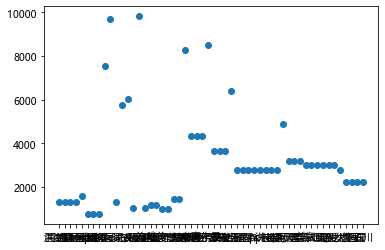

In [6]:
import pandas
import matplotlib.pyplot as plt
from pylab import mpl
import numpy as np

mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']    # 指定默认字体：解决plot不能显示中文问题
mpl.rcParams['axes.unicode_minus'] = False           # 解决保存图像是负号'-'显示为方块的问题

df = pandas.read_json(path_or_buf="data.json", orient='records',lines=True, encoding='utf-8',convert_dates=False)
print(type(df['tags'][0]))
print(type(df))
print(df)
# print(df[0:1])

print(type(df.loc[[0],['seen']]))

# 利用字典来统计tag出现的数量
count_dict = dict()
# print(count_dict)
for index,row in df.iterrows():
    #print(index)
    # print(row)
    for item in row[-1]:
        if item in count_dict:
            count_dict[item] += 1
        else:
            count_dict[item] = 1
# print(count_dict)

#字典中的key转换为列表
tag_list = list(count_dict.keys())
# print(len(tag_list))

#统计标签总观看数
seen_array=np.zeros(54)
i=0
for x in tag_list:
    # print(x)
    for y in range(28):
        dict1=df.loc[[y],['tags']]
        dict2=np.array(dict1)
        list1=dict1.values.flatten()
        list2=list1.tolist()
        #print(list2)
        if x in list2[0]:
            dict3=df.loc[[y],['seen']]
            dict4=np.array(dict1)
            list3=dict3.values.flatten()
            list4=list3.tolist()
            seen_array[i]+=int(list4[0][0])
            #print(seen_array[i])
    i+=1
    # print(seen_array[i-1])
    
plt.scatter(tag_list, seen_array)
plt.show()



运行结果
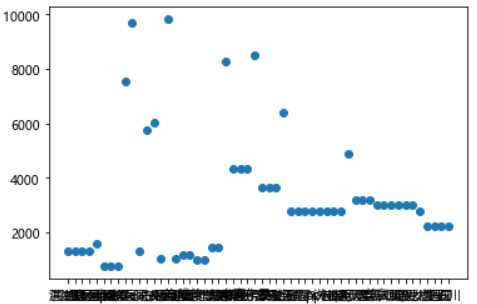